# Multiple regression model

This example generates synthetic data for advertising spend, number of salespeople, and sales. It then performs multiple linear regression analysis using the `Advertising_Spend` and `Num_Salespeople` as independent variables to predict `Sales`. The code also includes visualization to compare actual vs. predicted sales.

In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [29]:
# Set a random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
num_samples = 200
advertising_spend = np.random.uniform(50, 200, num_samples)
num_salespeople = np.random.randint(3, 10, num_samples)
error_term = np.random.normal(0, 20, num_samples)

sales = 50 + 2 * advertising_spend + 5 * num_salespeople + error_term

In [30]:
# Create a DataFrame
df = pd.DataFrame({'Advertising_Spend': advertising_spend, 'Num_Salespeople': num_salespeople, 'Sales': sales})
df.head()

,Advertising_Spend,Num_Salespeople,Sales
0,106.181018,6,282.863129
1,192.607146,5,447.147707
2,159.799091,3,419.907267
3,139.798773,6,367.697179
4,73.402796,8,211.587913


In [31]:
df.shape

(200, 3)

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


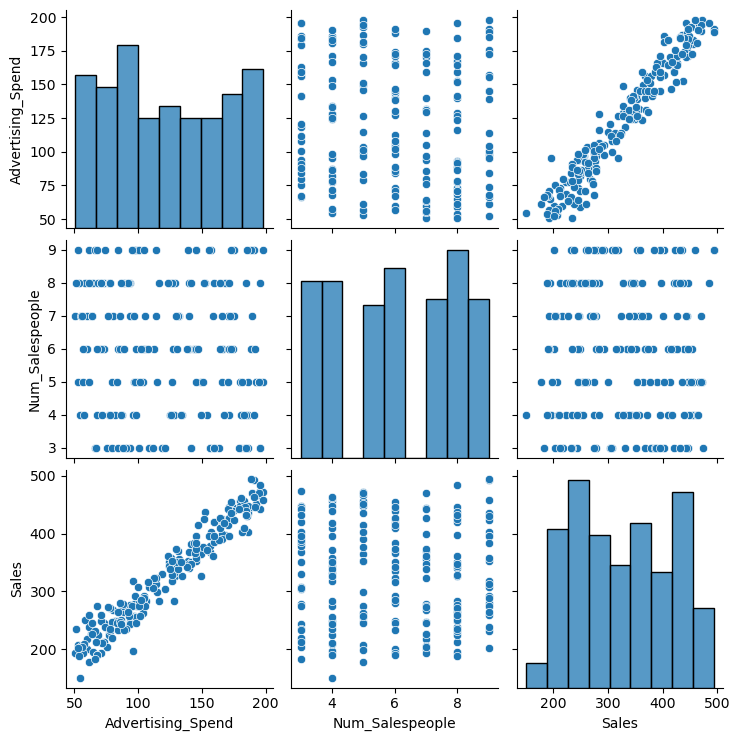

In [32]:
sns.pairplot(df)

In [33]:
df.corr()

,Advertising_Spend,Num_Salespeople,Sales
Advertising_Spend,1.000000,-0.158467,0.970023
Num_Salespeople,-0.158467,1.000000,-0.058324
Sales,0.970023,-0.058324,1.000000


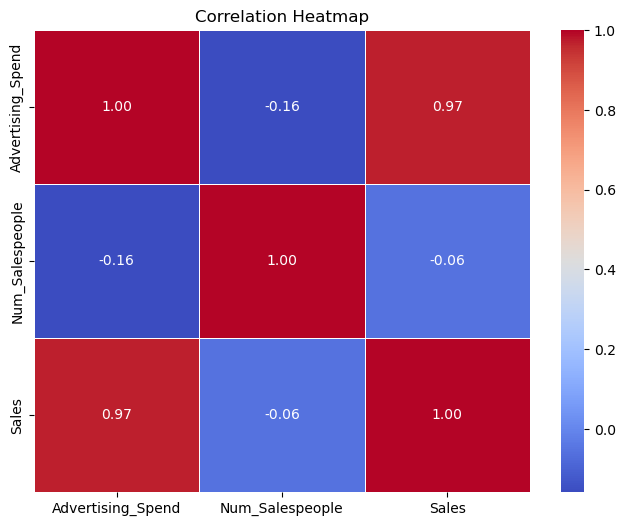

In [34]:
# Assuming df is your DataFrame containing the data
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Using OLS method

In [9]:
# Multiple Linear Regression
X = sm.add_constant(df[['Advertising_Spend', 'Num_Salespeople']])
y = df['Sales']

In [11]:
# Fit the model
model = sm.OLS(y, X).fit()

In [12]:
# Print the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     1883.
Date:                Wed, 17 Jan 2024   Prob (F-statistic):          4.07e-129
Time:                        09:35:00   Log-Likelihood:                -878.08
No. Observations:                 200   AIC:                             1762.
Df Residuals:                     197   BIC:                             1772.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                60.7880      6.36

In [22]:
# Add constant term to new data
new_data = pd.DataFrame({'Advertising_Spend': [150], 'Num_Salespeople': [6]})
new_data = sm.add_constant(new_data)

In [25]:
# Make predictions for new data
prediction = model.predict(new_data)

ValueError: shapes (1,2) and (3,) not aligned: 2 (dim 1) != 3 (dim 0)

C:\Users\hp\AppData\Local\Temp\ipykernel_27668\3524736740.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  ax.plot([min(y), max(y)], [min(y), max(y)], 'k--', lw=2, color='r')


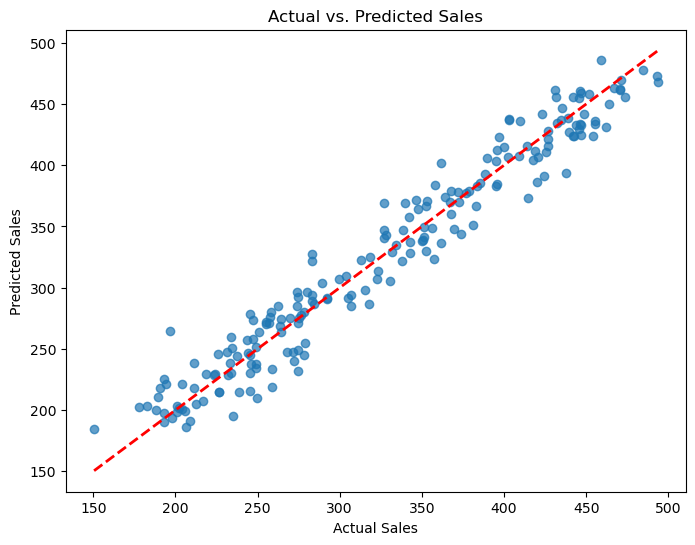

In [24]:
# Visualize the results
fig, ax = plt.subplots(figsize=(8, 6))

# Scatter plot of actual vs. predicted sales
ax.scatter(y, model.predict(X), alpha=0.7)
ax.plot([min(y), max(y)], [min(y), max(y)], 'k--', lw=2, color='r')
ax.set_xlabel('Actual Sales')
ax.set_ylabel('Predicted Sales')
ax.set_title('Actual vs. Predicted Sales')

plt.show()

# using the gradient dicent method


In [35]:
df.head()

,Advertising_Spend,Num_Salespeople,Sales
0,106.181018,6,282.863129
1,192.607146,5,447.147707
2,159.799091,3,419.907267
3,139.798773,6,367.697179
4,73.402796,8,211.587913


In [36]:
X= df.iloc[:,:-1]
y = df.iloc[:,-1]

In [37]:
X.head()

,Advertising_Spend,Num_Salespeople
0,106.181018,6
1,192.607146,5
2,159.799091,3
3,139.798773,6
4,73.402796,8


In [38]:
y

0      282.863129
1      447.147707
2      419.907267
3      367.697179
4      211.587913
          ...    
195    284.108977
196    361.437862
197    432.350677
198    410.036537
199    417.356115
Name: Sales, Length: 200, dtype: float64

In [39]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

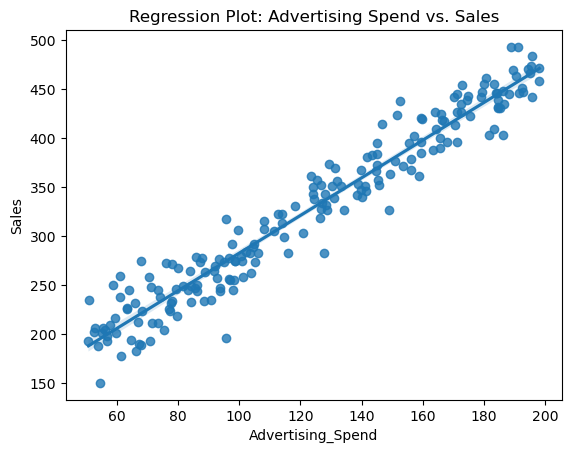

In [45]:
# this method of fitting line only works for one column not multiple columns together.

# Assuming df is your DataFrame containing the data
sns.regplot(data=df, x='Advertising_Spend', y='Sales')
plt.title('Regression Plot: Advertising Spend vs. Sales')
plt.show()

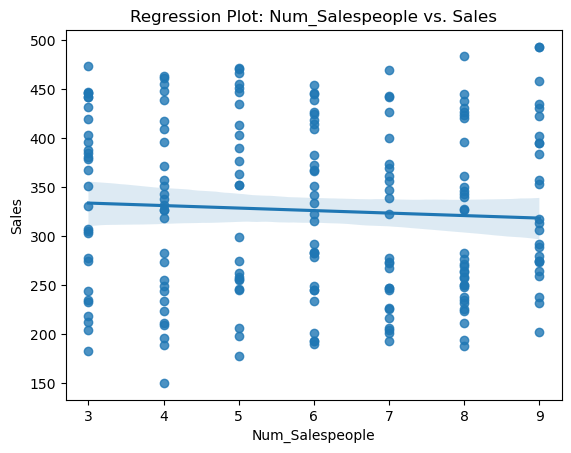

In [44]:
# Assuming df is your DataFrame containing the data
sns.regplot(data=df, x='Num_Salespeople', y='Sales')
plt.title('Regression Plot: Num_Salespeople vs. Sales')
plt.show()

so not a good fit.

In [46]:
from sklearn .preprocessing import StandardScaler

In [47]:
scaler =StandardScaler()
X_train =scaler.fit_transform(X_train)
X_test =scaler.fit_transform(X_test)

In [48]:
X_train

array([[ 0.49832067,  1.52411258],
       [-0.87769735,  1.52411258],
       [-1.11610751,  0.01009346],
       [ 1.12260942,  0.01009346],
       [-1.01271192, -0.99925262],
       [ 1.11397494,  0.5147665 ],
       [ 1.61102885, -0.49457958],
       [-1.55766704,  1.01943954],
       [ 0.08809105, -0.49457958],
       [ 0.12407097, -0.99925262],
       [ 0.35456423,  0.01009346],
       [-0.19783387,  1.52411258],
       [-1.06697356, -1.50392565],
       [ 1.17139936,  0.5147665 ],
       [ 1.09008674,  1.01943954],
       [ 0.18023809,  0.5147665 ],
       [-1.52733574,  0.5147665 ],
       [-0.82576708, -0.99925262],
       [-1.23920029, -0.99925262],
       [ 0.11073983, -0.99925262],
       [ 0.97759795,  0.01009346],
       [ 1.26705912, -1.50392565],
       [ 0.4987466 ,  0.01009346],
       [ 0.03088666,  1.01943954],
       [ 1.3746915 , -1.50392565],
       [ 1.08915013, -0.99925262],
       [-0.96839979,  0.5147665 ],
       [ 1.64259578,  1.01943954],
       [-1.53734316,

In [49]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [50]:
regression.fit(X_train, y_train)

LinearRegression()

Cross-validation is a statistical technique used in machine learning to assess the performance and generalizability of a predictive model. The primary goal of cross-validation is to ensure that a model trained on a particular dataset can generalize well to new, unseen data. It helps in estimating how well the model will perform on an independent dataset.

The process involves partitioning the dataset into multiple subsets, called folds. The model is trained on a subset of the data (training set) and evaluated on the remaining data (validation or test set). This process is repeated multiple times, each time using a different subset as the validation set. The most common form of cross-validation is k-fold cross-validation.

Here's a step-by-step explanation of k-fold cross-validation:

1. **Dataset Splitting:**
   - The dataset is divided into k equally sized folds.

2. **Model Training and Evaluation:**
   - The model is trained on k-1 folds (training set).
   - The model is evaluated on the remaining fold (validation or test set).

3. **Iteration:**
   - Steps 1 and 2 are repeated k times, each time using a different fold as the validation set.

4. **Performance Metrics:**
   - The performance metrics (e.g., accuracy, mean squared error) are averaged over the k iterations to obtain a more robust estimation of the model's performance.

Common variants of k-fold cross-validation include:

- **Stratified K-Fold:** Ensures that each fold maintains the same class distribution as the original dataset, which is particularly useful for imbalanced datasets.
  
- **Leave-One-Out (LOO):** Each observation is used as a validation set exactly once.

- **Leave-P-Out:** Similar to LOO, but leaves out p observations from the dataset.

Cross-validation helps in assessing how well a model generalizes to different subsets of the data, reducing the risk of overfitting to a specific training set. It provides a more reliable estimate of a model's performance compared to a single train-test split. The choice of k in k-fold cross-validation depends on the size and characteristics of the dataset, with common values being 5 or 10.

In [51]:
from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(regression, X_train, y_train, scoring='neg_mean_squared_error', cv=3)